In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# Import the data set
data_earth = pd.read_csv("earthquake.csv")
data_earth.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [3]:
# Check for the dataset informations
data_earth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [4]:
# Convert Date_time column to Year and Month
data_earth['date_time'] = pd.to_datetime(data_earth['date_time'])

# Spliting DateMonthYear to Year
data_earth['Year'] = pd.DatetimeIndex(data_earth["date_time"]).year

# Spliting DateMonthYear to month
data_earth['Month'] = pd.DatetimeIndex(data_earth["date_time"]).month

# Drop the original date_time column from dataset
data_earth.drop('date_time', axis = 1)

C:\Users\logan\AppData\Local\Temp\ipykernel_53064\3897704031.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_earth['date_time'] = pd.to_datetime(data_earth['date_time'])


,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,Year,Month
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu,2023,8
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN,2023,7
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina,2023,7
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN,2023,7
4,M 7.3 - Alaska Peninsula,7.3,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN,2023,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia,1995,5
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN,1995,5
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia,1995,5
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece,1995,5


In [5]:
# Drop the title, location columns
data_earth = data_earth.drop(['title', 'location'], axis  = 1)
data_earth.head()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
0,6.5,2023-08-16 12:47:00,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,NaN,Vanuatu,2023,8
1,6.5,2023-07-19 00:22:00,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN,2023,7
2,6.6,2023-07-17 03:05:00,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina,2023,7
3,7.2,2023-07-16 06:48:00,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,NaN,2023,7
4,7.3,2023-07-16 06:48:00,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,NaN,2023,7


In [6]:
# Drop the date_time, alert and magtype columns from dataset
data_earth = data_earth.drop(['date_time', 'alert', 'magType'], axis  = 1)
data_earth.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,depth,latitude,longitude,continent,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,192.955,-13.8814,167.1580,NaN,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,69.727,12.8140,-88.1265,NaN,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,171.371,-38.1911,-70.3731,South America,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,32.571,54.3844,-160.6990,NaN,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,21.000,54.4900,-160.7960,NaN,NaN,2023,7


In [7]:
# Check for the null values
data_earth.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
depth          0
latitude       0
longitude      0
continent    716
country      349
Year           0
Month          0
dtype: int64

In [8]:
# Fill the null values for continent and country
data_earth['continent'].fillna((data_earth['continent']).mode()[0], inplace = True)
data_earth['country'].fillna((data_earth['country']).mode()[0], inplace = True)

C:\Users\logan\AppData\Local\Temp\ipykernel_53064\1126233762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_earth['continent'].fillna((data_earth['continent']).mode()[0], inplace = True)
C:\Users\logan\AppData\Local\Temp\ipykernel_53064\1126233762.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [9]:
# Check for the null values again for the confirmation
data_earth.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
continent    0
country      0
Year         0
Month        0
dtype: int64

In [10]:
# Check the unique value from continent column
data_earth['continent'].unique()

array(['Asia', 'South America', 'Oceania', 'North America', 'Europe',
       'Africa'], dtype=object)

In [11]:
# Check the unique value from country column
data_earth['country'].unique()

array(['Vanuatu', 'Indonesia', 'Argentina', 'Colombia',
       'Russian Federation (the)', 'Papua New Guinea', 'Afghanistan',
       'Ecuador', 'Tajikistan', 'Turkiye', 'Solomon Islands', 'Fiji',
       'Panama', 'Mexico', 'Taiwan', "People's Republic of China",
       'Philippines', 'Brazil', 'Peru', 'United States of America',
       'Antarctica', 'Haiti', 'Japan', 'Mongolia', 'Greece', 'Chile',
       'Russia', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'South Georgia and the South Sandwich Islands', 'Venezuela',
       'Bolivia', 'Costa Rica', 'Iran', 'Guatemala', 'Botswana',
       'New Zealand', 'Italy', 'Myanmar', 'India', 'Nepal', 'Nicaragua',
       'Pakistan', 'Canada', 'Tonga', 'Kyrgyzstan', 'Martinique',
       'Mozambique', 'Tanzania', 'Algeria', 'El Salvador', 'Turkmenistan',
       'Azerbaijan', 'Iceland', 'Trinidad and Tobago', 'Saudi Arabia'],
      dtype=object)

In [12]:
# Drop continent and country columns
data_earth = data_earth.drop(['continent', 'country'], axis  = 1)

In [13]:
# Display the first 5 records
data_earth.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,depth,latitude,longitude,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,192.955,-13.8814,167.1580,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,69.727,12.8140,-88.1265,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,171.371,-38.1911,-70.3731,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,32.571,54.3844,-160.6990,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,21.000,54.4900,-160.7960,2023,7


In [14]:
# Display the last 5 records
data_earth.tail()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,depth,latitude,longitude,Year,Month
995,7.1,0,9,0,776,us,0,0.0,0.0,11.0,52.629,142.827,1995,5
996,7.7,0,4,0,912,us,0,0.0,0.0,20.2,-23.008,169.900,1995,5
997,6.9,0,6,0,732,us,0,0.0,0.0,11.2,-8.378,125.127,1995,5
998,6.6,0,9,0,670,us,0,0.0,0.0,14.0,40.149,21.695,1995,5
999,7.1,0,7,0,776,us,0,0.0,0.0,16.0,12.626,125.297,1995,5


In [15]:
# Import the label encoder library
from sklearn.preprocessing import LabelEncoder

In [16]:
# Convert the Object to Numeric types
label_encode = LabelEncoder()
for col in data_earth.select_dtypes(include=['object']).columns:
    data_earth[col] = label_encode.fit_transform(data_earth[col])

In [17]:
# Check the dataset
data_earth

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,depth,latitude,longitude,Year,Month
0,6.5,7,4,0,657,9,114,7.177000,25.0,192.955,-13.8814,167.1580,2023,8
1,6.5,8,6,0,775,9,92,0.679000,40.0,69.727,12.8140,-88.1265,2023,7
2,6.6,7,5,0,899,9,70,1.634000,28.0,171.371,-38.1911,-70.3731,2023,7
3,7.2,6,6,1,860,9,173,0.907000,36.0,32.571,54.3844,-160.6990,2023,7
4,7.3,0,5,1,820,1,79,0.879451,172.8,21.000,54.4900,-160.7960,2023,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0,9,0,776,9,0,0.000000,0.0,11.000,52.6290,142.8270,1995,5
996,7.7,0,4,0,912,9,0,0.000000,0.0,20.200,-23.0080,169.9000,1995,5
997,6.9,0,6,0,732,9,0,0.000000,0.0,11.200,-8.3780,125.1270,1995,5
998,6.6,0,9,0,670,9,0,0.000000,0.0,14.000,40.1490,21.6950,1995,5


In [20]:
# Featuring
# Take only latitude and longitude columns as seperate x dataset for the further validation
x = data_earth[['latitude', 'longitude']]
x

,latitude,longitude
0,-13.8814,167.1580
1,12.8140,-88.1265
2,-38.1911,-70.3731
3,54.3844,-160.6990
4,54.4900,-160.7960
...,...,...
995,52.6290,142.8270
996,-23.0080,169.9000
997,-8.3780,125.1270
998,40.1490,21.6950


<function matplotlib.pyplot.show(close=None, block=None)>

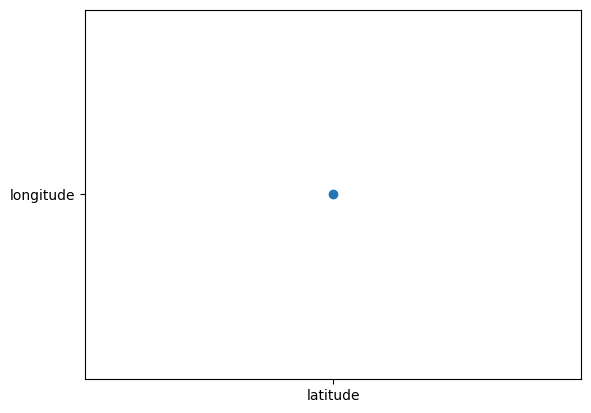

In [22]:
# Plot the scatter visulaization
plt.scatter(x = 'latitude', y = 'longitude')
plt.show

In [24]:
# Convert the data into standardization
scaler = StandardScaler()

# Define fit transform in data_scaled
data_scaled = scaler.fit_transform(x)

In [25]:
# Check the data
data_scaled

array([[-0.68358205,  0.98511215],
       [ 0.3192504 , -1.1890105 ],
       [-1.59679392, -1.03781421],
       ...,
       [-0.47684276,  0.62715642],
       [ 1.34610989, -0.25371905],
       [ 0.31218804,  0.62860422]], shape=(1000, 2))

In [26]:
# Define the dbscan 
# eps with 0.5 maximum distance between two points (radius)
# min_samples with 5, to form a dense region
dbscan = DBSCAN(eps = 0.5, min_samples = 5)

# Assign the dataset in labels
# Fit the DBSCAN into the dataset x
# Predict the cluster label for every point in x
labels = dbscan.fit_predict(x)


In [27]:
# Check the data
labels

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1,  3,  3,  3, 18,  4,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  5, -1, -1, -1,  7, -1,  1, -1, -1, -1, -1,  6,
        6,  6,  6,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 18,  1, -1, -1, -1,
       -1,  7, -1, -1,  7, -1, -1,  1,  1, -1,  7, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, 10, -1, -1, -1, -1, 11, 11, -1, -1, -1, -1, -1,
       -1, -1, 11, -1, -1, 12, -1, -1,  3, -1, 15, -1, -1, 11, -1,  8, -1,
       -1, -1, -1, -1, -1, -1, -1, 12, 12, 13, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [31]:
# Create new column with name as 'label' and fill the cluster labels
data_earth['label'] = labels

In [32]:
# Check the unique values from the cluster labels in 'Label' column and store in unique_labels variable
unique_labels = np.unique(data_earth['label'])
unique_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22])

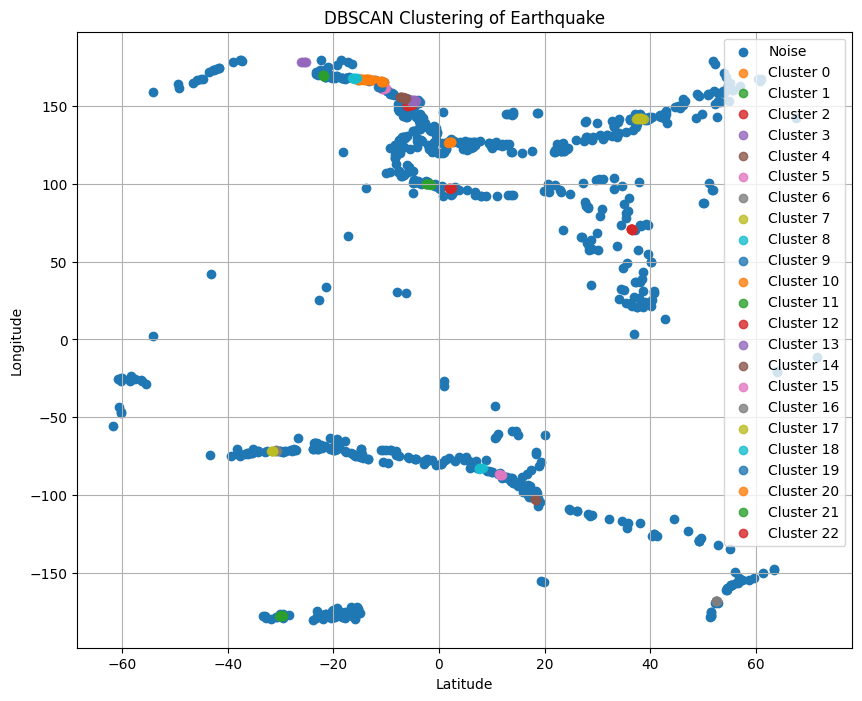

In [40]:
# Plot the scatter visualization
plt.figure(figsize = (10,8))
for i in unique_labels:
    data = data_earth[data_earth['label'] == i]
    if i == -1:
        plt.scatter(data['latitude'], data['longitude'], label = "Noise")
    else:
        plt.scatter(data['latitude'], data['longitude'], label = f"Cluster {i}", alpha = 0.8)
        
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DBSCAN Clustering of Earthquake")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()